In [1]:
import pandas as pd


In [45]:
df_male = pd.read_csv('/Male Data Sheet.csv')
df_female = pd.read_csv('/Female Data Sheet.csv')


In [49]:
df_combined['Population'] = df_combined['Population'].astype(str).str.replace(',', '').astype(int)
df_combined.loc[df_combined['Gender'] == 'Male', 'Population'] *= -1

def categorize_age(age):
    if age == '100+':
        return '80+'
    age = int(age)
    if age >= 80:
        return '80+'
    lower_bound = (age // 5) * 5
    upper_bound = lower_bound + 4
    return f'{lower_bound}-{upper_bound}'

df_combined['Age Group'] = df_combined['Age'].apply(categorize_age)

ordered_age_groups = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
df_combined['Age Group'] = pd.Categorical(df_combined['Age Group'], categories=ordered_age_groups, ordered=True)

print(df_combined.head())

  Age  Year  Population Gender Age Group
1   0  2009     -178195   Male       0-4
2   1  2009     -157247   Male       0-4
3   2  2009     -148754   Male       0-4
4   3  2009     -138616   Male       0-4
5   4  2009     -137653   Male       0-4


In [53]:
import matplotlib.pyplot as plt

def plot_age_sex_pyramid(df, year):


    df_year = df[df['Year'] == year].copy()


    df_grouped = df_year.groupby(['Age Group', 'Gender'], observed=False)['Population'].sum().reset_index()


    df_pivot = df_grouped.pivot(index='Age Group', columns='Gender', values='Population').fillna(0)


    if 'Male' not in df_pivot.columns: df_pivot['Male'] = 0
    if 'Female' not in df_pivot.columns: df_pivot['Female'] = 0

    current_age_groups = df_year['Age Group'].cat.categories
    df_pivot = df_pivot.reindex(current_age_groups)


    fig, ax = plt.subplots(figsize=(10, 8))


    ax.barh(df_pivot.index, df_pivot['Male'], color='skyblue', label='Male')

    ax.barh(df_pivot.index, df_pivot['Female'], color='salmon', label='Female')


    ax.set_xlabel('Population')
    ax.set_ylabel('Age Group')
    ax.set_title(f'Age-Sex Pyramid for Kazakhstan - {year}')


    ax.legend()


    max_abs_population = df_pivot[['Male', 'Female']].abs().max().max()
    ax.set_xlim(-max_abs_population * 1.1, max_abs_population * 1.1)


    ticks = ax.get_xticks()
    ax.set_xticks(ticks)
    ax.set_xticklabels([f'{int(abs(tick)):,}' for tick in ticks])

    plt.tight_layout()
    plt.show()

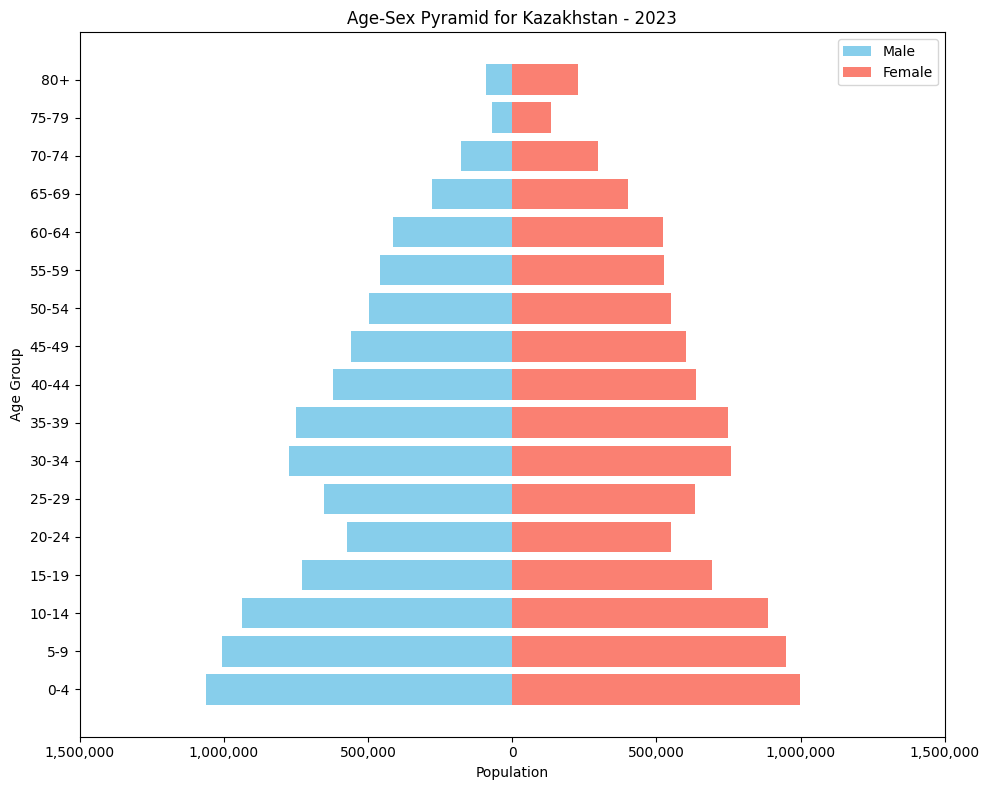

In [54]:
plot_age_sex_pyramid(df_combined, 2023)

In [52]:
from ipywidgets import interact, IntSlider, fixed

min_year = df_combined['Year'].min()
max_year = df_combined['Year'].max()

interact(plot_age_sex_pyramid, df=fixed(df_combined), year=IntSlider(min=min_year, max=max_year, step=1, value=max_year, description='Select Year'));

interactive(children=(IntSlider(value=2025, description='Select Year', max=2025, min=2009), Output()), _dom_cl…